
##### 2.Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0.

Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. [1 mark]

Find the MLE parameters for the loc and scale using gradient descent. Plot convergence plot as well. [1 mark]

Redo the above question but learn log(scale) instead of scale and then finally transform to learn scale. What can you conclude? Why is this transformation useful? [0.5 mark]

##### 3.Generate some data (1000 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0 and using Student-T distributions with varying degrees (from 1-8) of freedom (1000 data points corresponding to each degree of freedom). Plot the pdf (and logpdf) at uniformly spaced data from (-50, 50) in steps of 0.1. What can you conclude? [1 mark]

##### 4.Analytically derive the MLE for exponential distribution. Generate some data (1000 data points) using some fixed parameter values and see if you can recover the analytical parameters using gradient descent based solution for obtaining MLE. [1 mark]

##### 5.Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0. Now, create datasets of size 10, 20, 50, 100, 500, 1000, 5000, 10000. We will use a different random seed to create ten different datasets for each of these sizes. For each of these datasets, find the MLE parameters for the loc and scale using gradient descent. Plot the estimates of loc and scale as a function of the dataset size. What can you conclude? [1 mark]

In [19]:
import torch
import matplotlib.pyplot as plt
# from tueplots import bundles
# plt.rcParams.update(bundles.beamer_moml())



# # Also add despine to the bundle using rcParams
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False

# # Increase font size to match Beamer template
# plt.rcParams['font.size'] = 16
# # Make background transparent
# plt.rcParams['figure.facecolor'] = 'none'
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

##### 1.Optimise the following function using torch autograd and gradient descent, f(θ) = (θ₀ - 2)² + (θ₁ - 3)². In addition to finding the optima, you need to show the convergence plots. [0.5 marks]


In [2]:
# Define the function
def f(theta):
    return (theta[0] - 2)**2 + (theta[1] - 3)**2


In [6]:

# Initialize the parameters (θ₀ and θ₁) and learning rate
theta = torch.tensor([0.0, 0.0], requires_grad=True)
learning_rate = 0.1
num_iterations = 100
theta[0]

tensor(0., grad_fn=<SelectBackward0>)

In [7]:
loss_history = []
theta_history = []

for _ in range(num_iterations):
    loss = f(theta)
    #print(loss)
    loss_history.append(loss.item())
    theta_history.append(theta)
    #print(theta)
    loss.backward()  # Compute gradients
    with torch.no_grad():
        theta -= learning_rate * theta.grad  # Update parameters
        theta.grad.zero_()  # Reset gradients


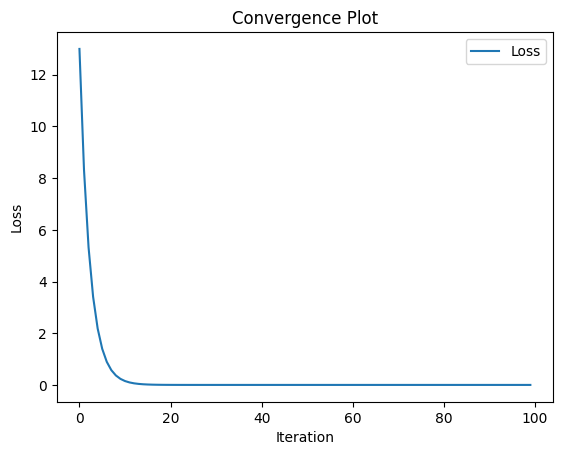

In [8]:

plt.plot(range(num_iterations), loss_history, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Plot')
plt.legend()
plt.show()


In [9]:

optimal_theta = theta.detach().numpy()
print("Optimal Parameters (θ₀, θ₁):", optimal_theta)
print("Optimal Value of f(θ):", f(optimal_theta))


Optimal Parameters (θ₀, θ₁): [1.9999998 2.9999995]
Optimal Value of f(θ): 2.8421709430404007e-13


In [1]:
import torch
import matplotlib.pyplot as plt

In [11]:
N = 100
torch.manual_seed(2)
samples = torch.distributions.Normal(2.0, 4.0).sample((N,))
samples
samples.mean(), samples.std(correction=0)

(tensor(2.1185), tensor(3.9651))

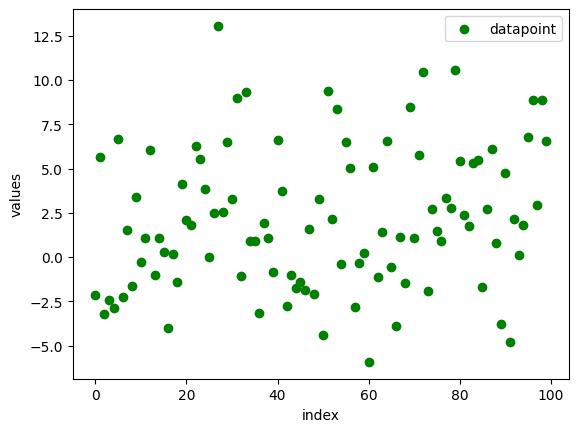

In [13]:
plt.scatter(range(N),samples,color='g',label='datapoint')
plt.xlabel('index')
plt.ylabel('values')
plt.legend();


In [14]:
#Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. [1 mark]
def ll(mu, sigma):
    mu = torch.tensor(mu)
    sigma = torch.tensor(sigma)
    dist = torch.distributions.Normal(mu, sigma)
    loglik = dist.log_prob(samples).sum()
    return dist, loglik

def plot_normal(mu, sigma):
    xs = torch.linspace(-5, 5, 100)
    dist, loglik = ll(mu, sigma)
    ys_log = dist.log_prob(xs)
    plt.plot(xs, ys_log)

    plt.scatter(samples, dist.log_prob(samples), color='C3', alpha=0.5)
    plt.title(f'log likelihood: {loglik:.8f}')
   

In [20]:
interact(plot_normal, mu=(-3.0, 3.0), sigma=(0.1, 10))


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_lls(mus, sigmas, lls):
    fig, ax1 = plt.subplots(figsize=(8, 6))
    
    X, Y = np.meshgrid(mus, sigmas)
    
    max_indices = np.unravel_index(np.argmax(lls), lls.shape)
    max_mu = mus[max_indices[1]]
    max_sigma = sigmas[max_indices[0]]
    max_loglik = lls[max_indices]

    # Define levels with increasing granularity
    levels_low = np.linspace(lls.min(), max_loglik, 20)
    levels_high = np.linspace(max_loglik + 0.001, lls.max(), 10)  # Adding a small value to prevent duplicates
    levels = levels_low
    
    # Plot the contour filled plot
    contour = ax1.contourf(X, Y, lls.T, levels=levels, cmap='magma')
    
    # Plot the contour lines
    contour_lines = ax1.contour(X, Y, lls.T, levels=levels, colors='black', linewidths=0.5, alpha=0.6)
    
    # Add contour labels
    ax1.clabel(contour_lines, inline=True, fontsize=10, colors='black', fmt='%1.2f')
    
    ax1.set_xlabel('Mu')
    ax1.set_ylabel('Sigma')
    ax1.set_title('Contour Plot of Log Likelihood')
    
    # Add maximum log likelihood point as scatter on the contour plot
    ax1.scatter([max_mu], [max_sigma], color='red', marker='o', label='Maximum Log Likelihood')
    ax1.annotate(f'Max LL: {max_loglik:.2f}', (max_mu, max_sigma), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3'))

    ax1.axvline(max_mu, color='red', linestyle='--', alpha=0.5)
    ax1.axhline(max_sigma, color='red', linestyle='--', alpha=0.5)
    
    # Create colorbar outside the plot
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(contour, cax=cax)
    cbar.set_label('Log Likelihood', rotation=270, labelpad=15)
    
    plt.tight_layout()
    plt.show()

plot_lls(mus, sigmas, lls)

In [ ]:
mus = torch.linspace(-0.4, 0.4, 200)
sigmas = torch.linspace(0.5, 1.0,200)
lls = get_lls(mus, sigmas)
plot_lls(mus, sigmas, lls)